<a href="https://colab.research.google.com/github/abyansetya/Praktikum_ML/blob/main/Tugas3_AByanSetyaneva_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Abyan Setyaneva

NIM : 24060122130058

Nama Dataset : Student Lifestyle

LINK : https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset

TUGAS 3 PRAKTIKUM ML

Pertemuan 3

In [ ]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
%matplotlib inline

In [ ]:
# Import dataset
dataset = pd.read_csv('student_lifestyle.csv')
data = dataset[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day', 'Extracurricular_Hours_Per_Day']]

In [ ]:
data.head(20)

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
5,6,6.0,2.1,8.0,0.3,7.6,2.85,Moderate
6,7,8.0,0.7,5.3,5.7,4.3,3.08,High
7,8,8.4,1.8,5.6,3.0,5.2,3.20,High
8,9,5.2,3.6,6.3,4.0,4.9,2.82,Low
9,10,7.7,0.7,9.8,4.5,1.3,2.76,Moderate


In [ ]:
#Pembersihan dan Reset Data dengan Penghapusan Nilai Kosong
print ("Lense Before: ", data.size)
data.describe()
data = data.dropna()
data = data.reset_index(drop=True)
print ("Lense After: ", dataset.size)
dataset.head(5)

Lense Before:  10000
Lense After:  16000


,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


 Algoritma ini membersihkan dataset dengan menghapus baris yang memiliki nilai kosong (NA), kemudian mengatur ulang indeks dataset untuk memastikan data tetap terstruktur dengan baik.

In [ ]:
#Normalisasi Data dengan Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler
x = data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx [0:5]

array([[0.38      , 0.74      , 0.13846154, 0.46666667, 0.95      ],
       [0.06      , 0.6       , 0.23076923, 0.7       , 0.875     ],
       [0.02      , 0.84      , 0.35384615, 0.2       , 0.975     ],
       [0.3       , 0.44      , 0.5       , 0.28333333, 0.525     ],
       [0.62      , 0.3       , 0.50769231, 0.36666667, 0.15      ]])

Algoritma ini menormalkan data menjadi rentang tertentu (biasanya 0 hingga 1) menggunakan Min-Max Scaler dari scikit-learn, sehingga semua fitur memiliki skala yang seragam tanpa mengubah pola hubungan antar data.








In [ ]:
#Menghitung Jarak Euclidean dan Hierarki Klustering dengan SciPy

import numpy as np
from scipy.spatial.distance import euclidean

leng = feature_mtx.shape[0]
D = np.zeros((leng, leng))  # Use numpy's zeros for initialization

for i in range(leng):
    for j in range(leng):
        D[i, j] = euclidean(feature_mtx[i], feature_mtx[j])  # Use scipy's euclidean function

import pylab
import scipy.cluster.hierarchy

Algoritma ini menghitung matriks jarak Euclidean antara semua pasangan data yang telah dinormalisasi dan menggunakan SciPy untuk melanjutkan proses klustering hierarkis, yang membantu mengelompokkan data berdasarkan kesamaan jarak.

In [ ]:
#Konstruksi Dendrogram dengan Metode Single Linkage
X = hierarchy.linkage(D, 'single')

<ipython-input-8-b6f6c2f2fae1>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(D, 'single')


Algoritma ini membangun hierarki klustering menggunakan metode single linkage, di mana jarak antar kelompok ditentukan oleh pasangan titik terdekat, berdasarkan matriks jarak Euclidean yang telah dihitung.

In [ ]:
#Penentuan Cluster Berdasarkan Jarak Maksimum
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(X, max_d, criterion='distance')
clusters

array([49, 49, 49, ..., 49, 49, 42], dtype=int32)

Algoritma ini membagi data ke dalam kelompok (clusters) menggunakan hierarki klustering dengan batas jarak maksimum tertentu. Data yang berada dalam jarak maksimum yang sama atau lebih kecil akan dikelompokkan bersama.

In [ ]:
#Pembentukan K-Cluster dengan Hierarki Klustering
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(X, k, criterion='maxclust')
clusters


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

Algoritma ini membagi data ke dalam sejumlah k kelompok (clusters) yang ditentukan, berdasarkan hasil hierarki klustering, dengan memastikan hanya ada maksimal k cluster yang terbentuk.

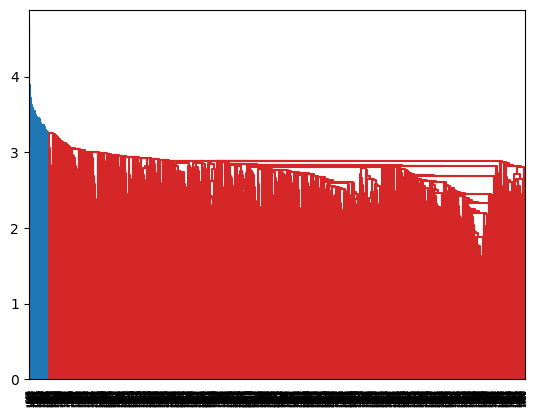

In [ ]:
#Visualisasi Dendrogram untuk Hierarki Klustering
dendro = hierarchy.dendrogram(X)

Algoritma ini membuat dendrogram, yaitu diagram berbentuk pohon yang memvisualisasikan hierarki klustering. Dendrogram menunjukkan bagaimana data digabungkan menjadi cluster pada berbagai tingkat jarak.

In [ ]:
#Konstruksi Dendrogram dengan Metode Average Linkage
Y = hierarchy.linkage(D, 'average')

<ipython-input-12-e98446c99915>:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(D, 'average')


Algoritma ini membangun hierarki klustering menggunakan metode average linkage, di mana jarak antar kelompok ditentukan oleh rata-rata jarak antara semua pasangan titik di kedua kelompok, berdasarkan matriks jarak Euclidean.

In [ ]:
#Penentuan Cluster dengan Average Linkage Berdasarkan Jarak Maksimum
from scipy.cluster.hierarchy import fcluster
max_d = 3
clusters = fcluster(Y, max_d, criterion='distance')
clusters

array([177,  33,  17, ..., 324, 584, 657], dtype=int32)

Algoritma ini membagi data ke dalam kelompok (clusters) berdasarkan hasil klustering hierarkis dengan metode average linkage. Data yang memiliki jarak maksimum sama dengan atau lebih kecil dari nilai yang ditentukan akan dikelompokkan bersama.

In [ ]:
#Pembentukan K-Cluster dengan Average Linkage
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Y, k, criterion='maxclust')
clusters

array([2, 1, 1, ..., 3, 5, 5], dtype=int32)

Algoritma ini membagi data menjadi sejumlah k kelompok (clusters) menggunakan hasil klustering hierarkis dengan metode average linkage, memastikan maksimum k cluster yang terbentuk berdasarkan hierarki.

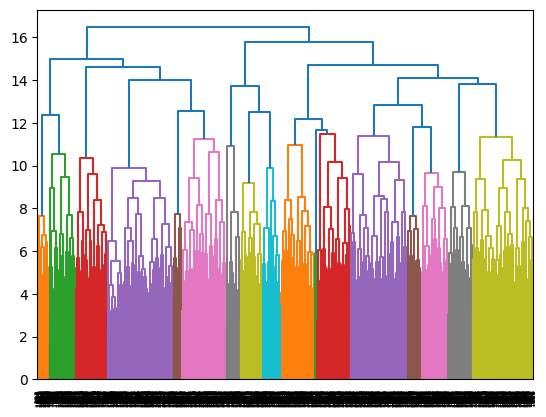

In [ ]:
#Pembentukan K-Cluster dengan Average Linkage
dendro = hierarchy.dendrogram(Y)

Algoritma ini membagi data menjadi sejumlah k kelompok (clusters) menggunakan hasil klustering hierarkis dengan metode average linkage, memastikan maksimum k cluster yang terbentuk berdasarkan hierarki.

In [ ]:
#Pembentukan K-Cluster dengan Average Linkage

dist_matrix = distance_matrix(feature_mtx, feature_mtx)
print(dist_matrix)

[[0.         0.43656632 0.50766785 ... 1.3275922  0.86691285 0.73490459]
 [0.43656632 0.         0.57822827 ... 1.26835961 0.91146633 0.89630926]
 [0.50766785 0.57822827 0.         ... 1.26131878 1.11840231 1.08290275]
 ...
 [1.3275922  1.26835961 1.26131878 ... 0.         0.84943882 1.02900893]
 [0.86691285 0.91146633 1.11840231 ... 0.84943882 0.         0.33386398]
 [0.73490459 0.89630926 1.08290275 ... 1.02900893 0.33386398 0.        ]]


Algoritma ini membagi data menjadi sejumlah k kelompok (clusters) menggunakan hasil klustering hierarkis dengan metode average linkage, memastikan maksimum k cluster yang terbentuk berdasarkan hierarki.

In [ ]:
#Klusterisasi Agglomeratif dengan Metode Single Linkage
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'single')
agglom.fit(feature_mtx)

AgglomerativeClustering(linkage='single', n_clusters=6)

Algoritma ini melakukan klusterisasi agglomeratif menggunakan metode single linkage, dengan membagi data menjadi 6 kelompok (clusters) berdasarkan kedekatan jarak antar data dalam dataset yang telah dinormalisasi.

In [ ]:
print(agglom.labels_)

[0 0 0 ... 0 0 0]


In [ ]:
dataset['cluster_'] = agglom.labels_
dataset.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,cluster_
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,0
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,0
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,0
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,0


In [ ]:

#Klusterisasi Agglomeratif dengan Metode Average Linkageagglom = AgglomerativeClustering(n_clusters = 6, linkage = 'average')
agglom.fit(feature_mtx)

AgglomerativeClustering(linkage='average', n_clusters=6)

Algoritma ini melakukan klusterisasi agglomeratif menggunakan metode average linkage, dengan membagi data menjadi 6 kelompok (clusters) berdasarkan rata-rata jarak antar data dalam dataset yang telah dinormalisasi.

In [ ]:
print(agglom.labels_)

[4 4 4 ... 3 0 5]


In [ ]:
dataset['cluster_'] = agglom.labels_
dataset.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level,cluster_
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate,4
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low,4
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low,4
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate,3
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High,5


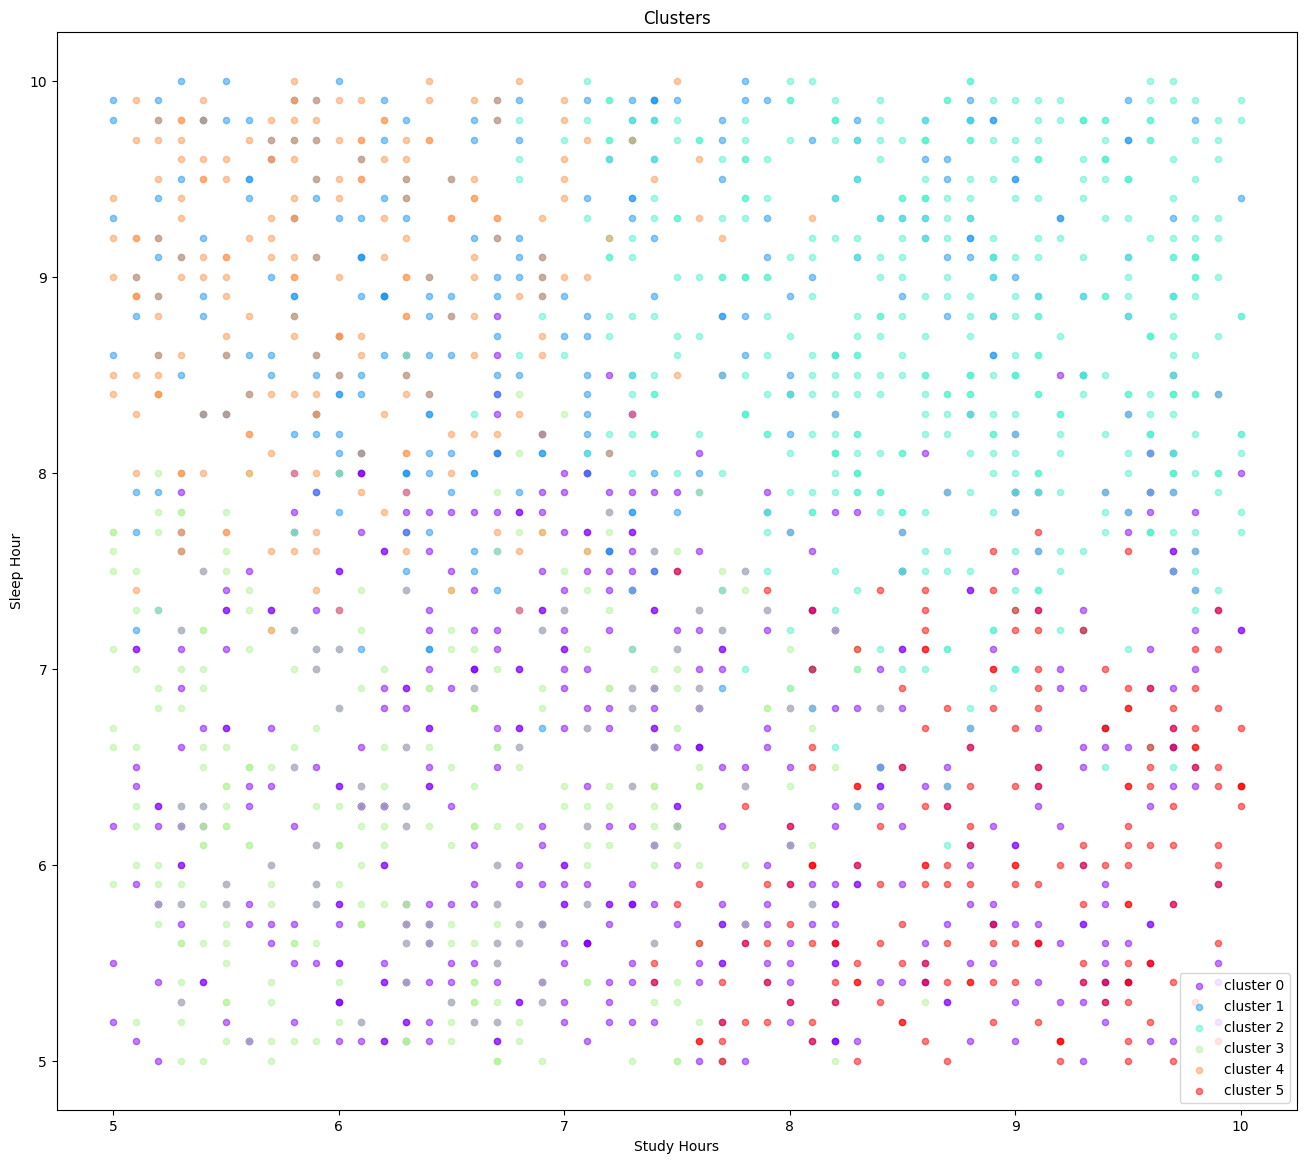

In [ ]:
#Visualisasi Kluster dengan Scatter Plot
import matplotlib.cm as cm
import matplotlib.pyplot as plt

n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(n_clusters))

plt.figure(figsize=(16, 14))


for color, label in zip(colors, cluster_labels):
    subset = dataset[dataset['cluster_'] == label]
    plt.scatter(subset['Study_Hours_Per_Day'], subset['Sleep_Hours_Per_Day'], s=20, c=[color],
                label='cluster ' + str(label), alpha=0.5)

plt.legend()
plt.title('Clusters')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hour')
plt.show()

In [ ]:
dataset.groupby(['cluster_', 'Physical_Activity_Hours_Per_Day'])['cluster_'].count()

cluster_  Physical_Activity_Hours_Per_Day
0         0.1                                3
          0.2                                2
          0.3                                5
          0.4                                5
          0.5                                7
                                            ..
5         8.8                                3
          8.9                                2
          9.0                                1
          9.1                                1
          9.7                                1
Name: cluster_, Length: 446, dtype: int64

In [ ]:
agg_cars = dataset.groupby(['cluster_', 'Physical_Activity_Hours_Per_Day'])[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']].mean() # Change 'data' to 'dataset' and select appropriate columns for the lenses dataset
print(agg_cars)

                                          Study_Hours_Per_Day  \
cluster_ Physical_Activity_Hours_Per_Day                        
0        0.1                                         8.166667   
         0.2                                         8.350000   
         0.3                                         9.240000   
         0.4                                         8.660000   
         0.5                                         9.071429   
...                                                       ...   
5        8.8                                         8.300000   
         8.9                                         7.550000   
         9.0                                         7.600000   
         9.1                                         7.600000   
         9.7                                         8.100000   

                                          Sleep_Hours_Per_Day  \
cluster_ Physical_Activity_Hours_Per_Day                        
0        0.1            